<a href="https://colab.research.google.com/github/Prajwal270/CNN1.1/blob/master/IDG_with_agumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print('Prajwal Raj')

Prajwal Raj


In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-02-27 17:16:03--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  42.1MB/s    in 1.6s    

2020-02-27 17:16:05 (42.1 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os 
import zipfile

In [0]:
local_dir = '/tmp/cats_and_dogs_filtered.zip'
zip = zipfile.ZipFile(local_dir,'r')
zip.extractall('/tmp/cats_and_dogs')
zip.close()

In [0]:
base_dir = '/tmp/cats_and_dogs'
train_dir = os.path.join(base_dir, 'train')

In [0]:
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

In [6]:
import tensorflow as tf
model = tf.keras.models.Sequential([

tf.keras.layers.Conv2D(16,(2,2), input_shape=(150,150,3), activation = 'relu'),
tf.keras.layers.MaxPool2D(2,2),

tf.keras.layers.Conv2D(64,(2,2),  activation = 'relu'), 
tf.keras.layers.MaxPool2D(2,2),    

tf.keras.layers.Conv2D(120,(2,2), activation = 'relu'), 
tf.keras.layers.MaxPool2D(2,2),    

tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 149, 149, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 73, 73, 64)        4160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 35, 35, 120)       30840     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 120)       0         
_________________________________________________________________
flatten (Flatten)            (None, 34680)             0

In [8]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr = 0.001), metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train = ImageDataGenerator( rescale=1./255,
                           rotation_range=40,
                           width_shift_range =0.2,
                           height_shift_range=0.2,
                           shear_range = 0.2,
                           zoom_range=0.2,
                           horizontal_flip = True,
                           fill_mode = 'nearest')

In [10]:
train_gen = train.flow_from_directory(
    '/tmp/cats_and_dogs',
    batch_size = 30,
    target_size = (150,150),
    class_mode = 'binary'
)

Found 2999 images belonging to 1 classes.


In [11]:
history = model.fit_generator(
    train_gen,
    steps_per_epoch = 40,
    epochs = 5,
    verbose = 2
)

Epoch 1/5
40/40 - 37s - loss: 0.0191 - acc: 0.9750
Epoch 2/5
40/40 - 34s - loss: 8.9690e-08 - acc: 1.0000
Epoch 3/5
40/40 - 33s - loss: 1.5836e-07 - acc: 1.0000
Epoch 4/5
40/40 - 33s - loss: 2.2614e-09 - acc: 1.0000
Epoch 5/5
40/40 - 32s - loss: 4.2353e-09 - acc: 1.0000


# 2nd part

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
  
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=20,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

--2020-02-27 18:45:45--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 2404:6800:4003:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   125MB/s    in 0.5s    

2020-02-27 18:45:51 (125 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
Epoch 1/100
50/20 - 3s - loss: 0.6901 - acc: 0.5810
20/20 - 11s - loss: 0.6992 - acc: 0.5225 - val_loss: 0.6905 - val_acc: 0.5810
Epoch 2/100
Epoch 1/100
50/20 - 3s - loss: 0.6863 - acc: 0.6080
20/20 - 4s - loss: 0.6911 - acc: 0.5225 - val_loss: 0.6869 - val_acc: 0.6080
Epoch 3/100
Epoch 1/100
50/20 - 3s - loss: 0.6826 - acc: 0.5600
20/20 - 4s - loss: 0.6821 - acc: 0.5800 - val_loss: 0.6828 - val_acc: 0.5600
Epoch 4/100
Epoch 1/100
50/20 - 3s - loss: 0.6793 - acc: 0.5970
20/20 - 4s - loss: 0.6864 - acc: 0.5450 - val_loss: 0.6702 - val_acc: 0.5970
Epoch 5/100
Epoch 1/100
50/20 - 3s - loss: 0.6671 - acc: 0.6410
20/20 - 4s - loss: 0.6726 - acc: 0.5950 - val_loss: 0.6586 - val_acc: 0.6410
Epoch 6/100
Epoch 1/100
50/20 - 3s 

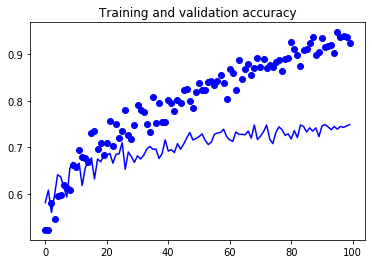

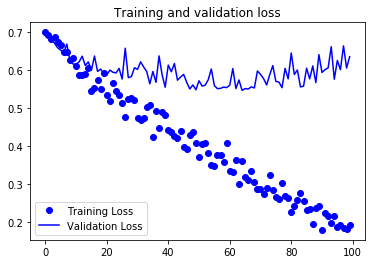

In [2]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()